### Analysis of Retail Sales Data - A Data Analytics Project

**Created by:** David Hüttelmeyer  

**Project description:**

In this project, I analyzed the sales data of a fictional retail company to identify key patterns and trends in customer behavior. I presented the results through visualizations in this Jupyter Notebook as well as in a Tableau dashboard.

**The key questions that should be answered:** 
1. How did the monthly revenue evolve?
2. Which age group generated the highest revenue?
3. Are there differences in purchasing behavior between women and men?
4. Which product category is the bestseller?

### Data source and description
The data comes from the Retail Sales Dataset on Kaggle, which is available at the following link:  

https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

The dataset contains the following columns:
- Transaction ID
- Date
- Customer ID
- Gender
- Age
- Product Category
- Quantity
- Price per Unit
- Total Amount

### Data Cleaning and Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the CSV file
df = pd.read_csv("data.csv")

In [2]:
# Remove duplicates
df = df.drop_duplicates()

In [3]:
# Number of rows in the dataset
rows = df.shape[0]
print(rows)

1000


In [4]:
# Display the first five rows of each column
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
# Checking for missing values
print(df.isnull().sum()) 

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [6]:
# Checking the data types
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [7]:
# Convert the 'Date' column to 'datetime' 
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Create a new column: Extract year and month from 'Date' 
df['year_month'] = df['Date'].dt.to_period('M')

In [9]:
# Split the 'Age' column into multiple age groups
def categorize_age(age):
    if age >= 18 and age <= 24:
        return '18-24'
    elif age >= 25 and age <= 34:
        return '25-34'
    elif age >= 35 and age <= 44:
        return '35-44'
    elif age >= 45 and age <= 54:
        return '45-54'
    elif age >= 55 and age <= 64:
        return '55-64'

# Add a new column 'Age Group'
df['Age Group'] = df['Age'].apply(categorize_age)

In [10]:
# Save the data as a CSV file
df.to_csv("cleaned_sales_data.csv", index=False)

### Exploratory Data Analysis

**1. How did the monthly revenue evolve?**

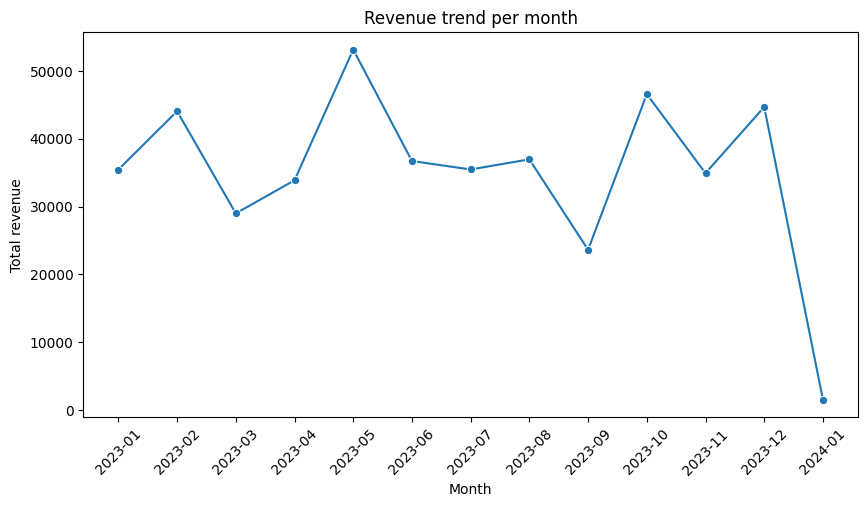

In [11]:
# Calculate revenue per month
monthly_sales = df.groupby('year_month')['Total Amount'].sum()

# Create a plot
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.xticks(rotation=45)
plt.title("Revenue trend per month")
plt.ylabel("Total revenue")
plt.xlabel("Month")
plt.show()

**2. Which age group generated the highest revenue?**

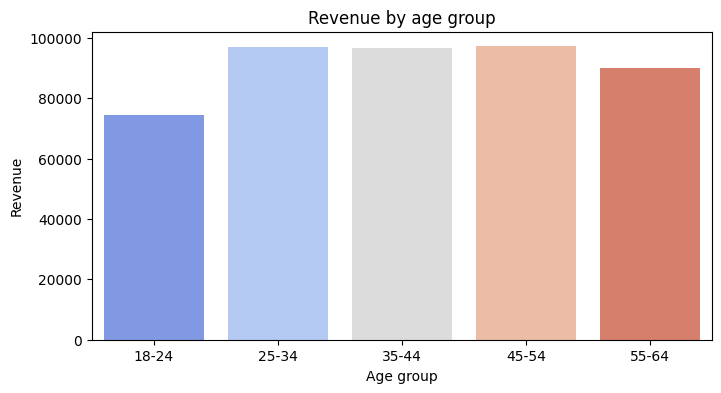

In [12]:
# Revenue by age group
age_group_sales = df.groupby('Age Group')['Total Amount'].sum()

# Create a plot
plt.figure(figsize=(8,4))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, hue=age_group_sales.index, palette="coolwarm", legend=False)
plt.title("Revenue by age group")
plt.ylabel("Revenue")
plt.xlabel("Age group")
plt.show()

**3. Are there differences in purchasing behavior between women and men?**

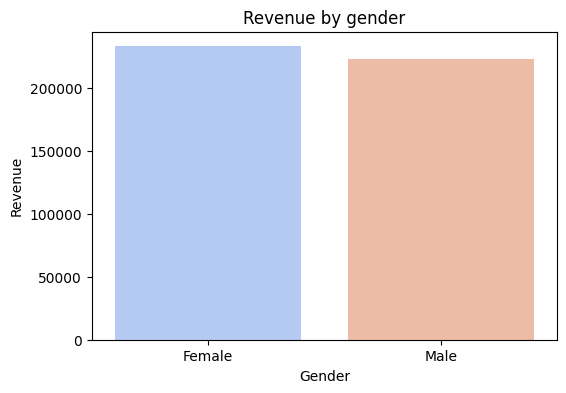

In [13]:
# Calculate revenue by gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

# Create a plot 
plt.figure(figsize=(6,4))
sns.barplot(x=gender_sales.index, y=gender_sales.values, hue=gender_sales.index, palette="coolwarm", legend=False)
plt.title("Revenue by gender")
plt.ylabel("Revenue")
plt.xlabel("Gender")
plt.show()

**4. Which product category is the bestseller?**

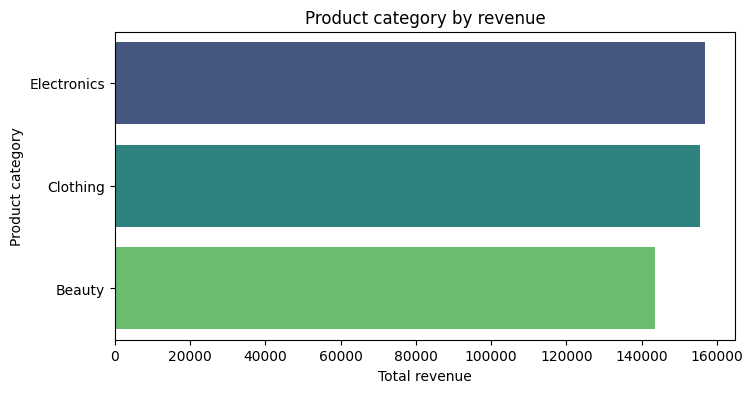

In [14]:
# Product category by revenue
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Create a plot
plt.figure(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis", legend=False)
plt.title("Product category by revenue")
plt.xlabel("Total revenue")
plt.ylabel("Product category")
plt.show()

### Insights from the analysis

**Revenue trend**

- Revenue fluctuates significantly from month to month.
- Particularly noticeable is the sharp decline in revenue since December 2023, which is due to the fact that there were only two sales in January 2024.
- The highest revenue was generated in May 2023.

**Revenue by age group**

- The highest revenue was generated by the age group 45-54.
- However, it can be observed that the revenues of the age groups between 25 and 54 are very close to each other.
- The age group 18-24 generated the lowest revenue, followed by the age group 55-64.


**Purchasing behavior of women and men**

- There is no significant difference in revenue between women and men.

**Best-selling product category**

- The product category 'Electronics' generated the highest revenue.
- The 'Clothing' category generated a similarly high revenue.
- The product category 'Beauty' had the lowest sales.


### Tableau dashboard 

Additionally, I created a Tableau dashboard, which can be found in my GitHub repository under **'Tableau_dashboard'**.